In [2]:
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skewnorm
import sklearn

In [5]:
sklearn.__version__

'0.23.2'

#### Below begins the building of the dataset. It starts with creating a column called milcol.  Its values are auto-generated with numpy's random integer generated and will be a 1 or a 0.

In [6]:
#creating the military data column.
milcol = list(np.random.randint(0,2,(12000)))

#### The civilian data column is built by iterating about the milcol list.  Any value of 1 will be converted to a 0 and vice versa.

In [7]:
#creating the civilian data column.
civcol=[]
for i in milcol:
    if i.item() == 1:
        civcol.append(i.item()-1)
    if i.item() == 0:
        civcol.append(i.item()+1)

#### The rest of the data set is populated with random integers and then everything is combined into one dataframe.

In [8]:
#creating a variable with all column names
column_names=['Flew Fighter','Flew Cargo','Flew Corporate',
              'Flew RJ', 'Arts Degree','Stem Degree',
              'A-Hours','B-Hours','C-Hours',
              'Prev Capt','Prev Rot-Wing']

#creating a synthetic dataset of random numbers either 0 or 1
syn_data =pd.DataFrame(np.random.randint(0,2,(12000,11)),
                       columns = column_names)

#creating a synthetic dataset of military and civilian columns
df1=pd.DataFrame(
    {"Is Military":milcol,
     "Is Civilian":civcol}
               )

In [9]:
#combining the two datasets above to create one
df2 = pd.concat([df1, syn_data], axis=1)
df2

,Is Military,Is Civilian,Flew Fighter,Flew Cargo,Flew Corporate,Flew RJ,Arts Degree,Stem Degree,A-Hours,B-Hours,C-Hours,Prev Capt,Prev Rot-Wing
0,0,1,1,0,0,0,0,1,0,1,0,0,0
1,0,1,1,0,1,0,1,1,1,1,0,0,0
2,1,0,0,1,1,0,0,1,0,1,1,1,1
3,1,0,0,0,0,1,1,0,0,1,1,0,1
4,0,1,0,0,1,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,1,0,1,1,0,0,0,0,0,0,1,0,1
11996,0,1,1,1,0,1,0,1,0,0,1,0,0
11997,1,0,0,0,1,1,0,1,1,1,1,0,0
11998,0,1,0,1,0,1,0,1,0,1,1,0,1


#### Take a look at the df_final dataframe above and make sure it is fully popluated.  There are currently some value combinations along the rows that are highly unlikely and need to be addressed.  Below is the code that creates conditions where each row will make sense and replicate the traits of a real pilot.  i.e. No civilians that flew fighter jets, etc., etc.

In [10]:
#if Is Civilian, then Flew Fighters = 0
ftr_is_zero = (df2["Is Civilian"]==1)
df2.loc[(ftr_is_zero, "Flew Fighter")]=0

#if Flew Fighter = 1, then Flew Cargo = 0
trans_is_zero = (df2["Flew Fighter"]==1)
df2.loc[(trans_is_zero,"Flew Cargo")]=0

#if Flew Fighter = 1, then Flew Corporate = 0
no_corp_if_ftr = (df2["Flew Fighter"]==1)
df2.loc[no_corp_if_ftr, "Flew Corporate"]=0

#if Flew Cargo = 1, then Flew RJ = 0
no_car_rj = (df2["Flew Cargo"]==1)
df2.loc[no_car_rj, "Flew RJ"]=0

#if Arts Degree = 1, then Stem Degree = 0
other_deg = (df2["Arts Degree"]==1)
df2.loc[(other_deg, "Stem Degree")]=0

#if Arts Degree = 0, then Stem Degree = 1
other_deg2 = (df2["Arts Degree"]==0)
df2.loc[(other_deg2, "Stem Degree")]=1

#if Is Military = 1, then Prev Capt = 0
never_cpt = (df2["Is Military"]==1)
df2.loc[never_cpt, "Prev Capt"]=0

#if Flew Corporate = 1, then Flew RJ = 0
not_rj = (df2["Flew Corporate"]==1)
df2.loc[not_rj, "Flew RJ"]=0

#if A-Hours = 1, then B-Hours = 0
hours1 = (df2["A-Hours"]==1)
df2.loc[(hours1, "B-Hours")]=0

#if B-Hours = 1, then C-Hours = 0
hours2 = (df2["B-Hours"]==1)
df2.loc[(hours2, "C-Hours")]=0

#if A-Hours = 1, then C-Hours = 0
hours3 = (df2["A-Hours"]==1)
df2.loc[(hours3, "C-Hours")]=0

#if Is Civilian = 1, then Prev Rot-Wing = 0
no_helo1 = (df2["Is Civilian"]==1)
df2.loc[(no_helo1, "Prev Rot-Wing")]=0

#if Flew Fighter = 1, then Prev Rot-Wing = 0
no_helo2 = (df2["Flew Fighter"]==1)
df2.loc[(no_helo2, "Prev Rot-Wing")]=0          

In [11]:
#A more accuract desctiption of a poplution of pilots
df2

,Is Military,Is Civilian,Flew Fighter,Flew Cargo,Flew Corporate,Flew RJ,Arts Degree,Stem Degree,A-Hours,B-Hours,C-Hours,Prev Capt,Prev Rot-Wing
0,0,1,0,0,0,0,0,1,0,1,0,0,0
1,0,1,0,0,1,0,1,0,1,0,0,0,0
2,1,0,0,1,1,0,0,1,0,1,0,0,1
3,1,0,0,0,0,1,1,0,0,1,0,0,1
4,0,1,0,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,1,0,1,0,0,0,0,1,0,0,1,0,0
11996,0,1,0,1,0,0,0,1,0,0,1,0,0
11997,1,0,0,0,1,0,0,1,1,0,0,0,0
11998,0,1,0,1,0,0,0,1,0,1,0,0,0


In [12]:
#low time helo to fixed wing transition array
helo = np.array([[1,0,0,0,1,0,1,0,1,0,0,0,1]])

#low time fighter pilot array
low_time = np.array([[1,0,1,0,0,0,0,1,1,0,0,0,0]])

In [13]:
#creating bias data
helo_bias = pd.DataFrame(helo, columns = df2.columns)
low_time_bias = pd.DataFrame(low_time, columns = df2.columns)

#populating a helo bias table
helo_bias = pd.concat([helo_bias]*2000, axis=0, ignore_index=True)
#populating a low time bias table
low_ti_bias = pd.concat([low_time_bias]*3000, axis=0, ignore_index=True)

#combining low time bias and helo bias dataframes into one 
df_bias = pd.concat([helo_bias, low_ti_bias], axis=0)

#Creating the final data frame which is a combination of#
#the synthetic data and the bias data####################
final = pd.concat([df2, df_bias], ignore_index=True)


In [14]:
#quick view of the final dataframe
final

,Is Military,Is Civilian,Flew Fighter,Flew Cargo,Flew Corporate,Flew RJ,Arts Degree,Stem Degree,A-Hours,B-Hours,C-Hours,Prev Capt,Prev Rot-Wing
0,0,1,0,0,0,0,0,1,0,1,0,0,0
1,0,1,0,0,1,0,1,0,1,0,0,0,0
2,1,0,0,1,1,0,0,1,0,1,0,0,1
3,1,0,0,0,0,1,1,0,0,1,0,0,1
4,0,1,0,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,1,0,1,0,0,0,0,1,1,0,0,0,0
16996,1,0,1,0,0,0,0,1,1,0,0,0,0
16997,1,0,1,0,0,0,0,1,1,0,0,0,0
16998,1,0,1,0,0,0,0,1,1,0,0,0,0


In [15]:
#creating random variables for the retrain targets
norm_ret = pd.DataFrame(np.random.randint(0,1,(12000)))

#create a biased retrain target away from the normal mean
bias_ret = pd.DataFrame(np.random.randint(1,3,(5000)))

In [16]:
final["# of Retrains"] = pd.concat([norm_ret,bias_ret], ignore_index=True)
final

,Is Military,Is Civilian,Flew Fighter,Flew Cargo,Flew Corporate,Flew RJ,Arts Degree,Stem Degree,A-Hours,B-Hours,C-Hours,Prev Capt,Prev Rot-Wing,# of Retrains
0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
1,0,1,0,0,1,0,1,0,1,0,0,0,0,0
2,1,0,0,1,1,0,0,1,0,1,0,0,1,0
3,1,0,0,0,0,1,1,0,0,1,0,0,1,0
4,0,1,0,0,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,1,0,1,0,0,0,0,1,1,0,0,0,0,1
16996,1,0,1,0,0,0,0,1,1,0,0,0,0,1
16997,1,0,1,0,0,0,0,1,1,0,0,0,0,1
16998,1,0,1,0,0,0,0,1,1,0,0,0,0,2


#### The section below begins the process of plotting, and processing the data through ML algorithms.

In [17]:
#This cell adds the values in every column and creates a list#
#of sums.  Those values will be used in the bar charting.#####

x=np.arange(len(final.columns))
col_sums = []
for column in final.columns:
    sums = sum(final[column])
    col_sums.append(sums)
    
#view the sum of each column as a list
final.columns,col_sums

(Index(['Is Military', 'Is Civilian', 'Flew Fighter', 'Flew Cargo',
        'Flew Corporate', 'Flew RJ', 'Arts Degree', 'Stem Degree', 'A-Hours',
        'B-Hours', 'C-Hours', 'Prev Capt', 'Prev Rot-Wing', '# of Retrains'],
       dtype='object'),
 [11006,
  5994,
  6025,
  4500,
  6433,
  2607,
  7965,
  9035,
  10910,
  3039,
  1530,
  2952,
  3482,
  7514])

Text(0.5, 1.0, 'Model Attributes')

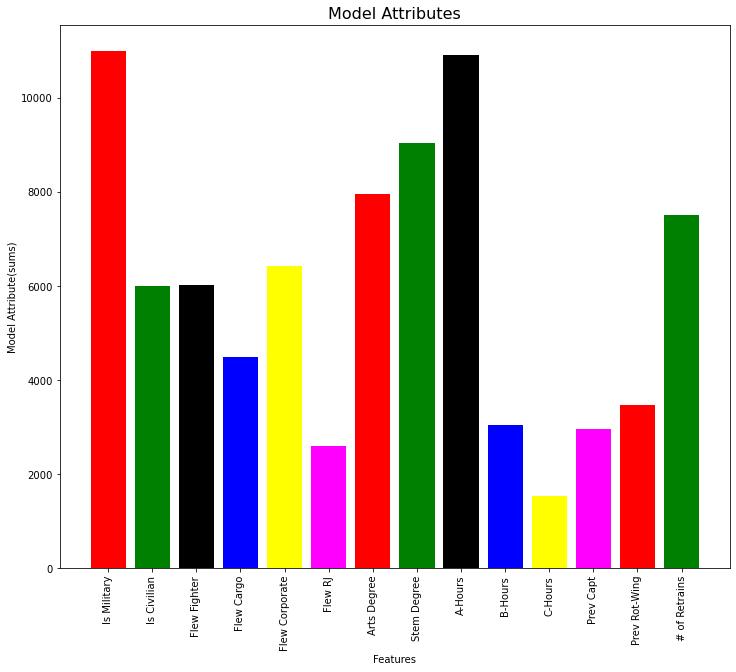

In [18]:
#ax=sns.barplot(x=np.arange(len(df_final.columns)), y=col_sums)
#(df_final.columns)


ys = np.arange(len(final.columns))
x_labels = final.columns
my_colors = ["red","green","black","blue","yellow", "magenta"]

fig, ax = plt.subplots(figsize = (12,10))
plt.bar(ys,col_sums,color = my_colors)

plt.xticks(ys, x_labels,rotation=90)
plt.xlabel('Features')
plt.ylabel('Model Attribute(sums)')
plt.title("Model Attributes", fontsize=16)

#### Ultimately our real data set would have move variability in it but for a snthetic data set this is a great start.  Below we need to create a data set that is our target variable.  That variable will be a number of retrains that have historically occured with the given pilot attributes.  The goal is to train an algorithm that will be able to predict a number of retrains given a pilots attributes.

Text(0, 0.5, 'Frequency')

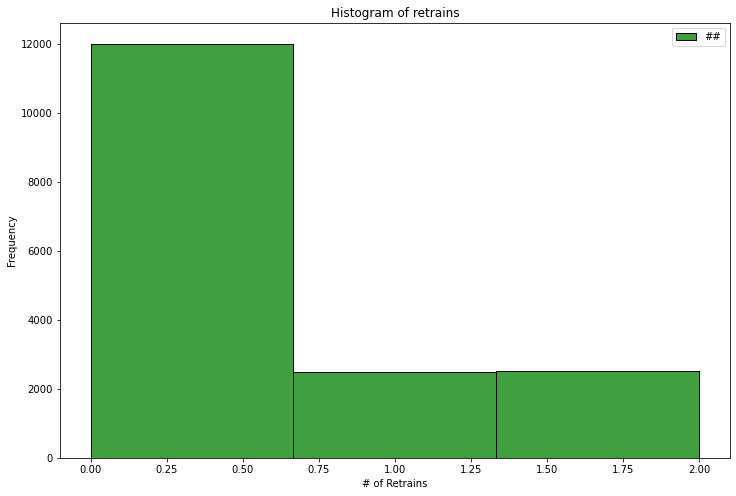

In [19]:
#plotting a histogram of the retrain column
fig, ax = plt.subplots(figsize = (12,8))
sns.histplot(
    final["# of Retrains"],
    bins=3,
    color = 'green',
    kde = False)

legends = ['##']
plt.legend(legends)
ax.set_title("Histogram of retrains")
ax.set_xlabel("# of Retrains")
ax.set_ylabel("Frequency")

In [20]:
#labeling the X(features) and y(targets)
y=final["# of Retrains"].astype(int)
X=final.drop(("# of Retrains"), axis=1)

In [21]:
y

0        0
1        0
2        0
3        0
4        0
        ..
16995    1
16996    1
16997    1
16998    2
16999    1
Name: # of Retrains, Length: 17000, dtype: int32

In [22]:
X

,Is Military,Is Civilian,Flew Fighter,Flew Cargo,Flew Corporate,Flew RJ,Arts Degree,Stem Degree,A-Hours,B-Hours,C-Hours,Prev Capt,Prev Rot-Wing
0,0,1,0,0,0,0,0,1,0,1,0,0,0
1,0,1,0,0,1,0,1,0,1,0,0,0,0
2,1,0,0,1,1,0,0,1,0,1,0,0,1
3,1,0,0,0,0,1,1,0,0,1,0,0,1
4,0,1,0,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,1,0,1,0,0,0,0,1,1,0,0,0,0
16996,1,0,1,0,0,0,0,1,1,0,0,0,0
16997,1,0,1,0,0,0,0,1,1,0,0,0,0
16998,1,0,1,0,0,0,0,1,1,0,0,0,0


In [30]:
#importing the necessary libraries to run the ML algorithms
from sklearn.ensemble import GradientBoostingRegressor as gbr
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split

In [31]:
#splitting the train and test data
X_train, X_test, y_train, y_test = train_test_split(
    X,y, random_state=42, test_size = 0.2)

In [32]:
estimator = gbr()

In [33]:
%%time
estimator.fit(X_train, y_train)

Wall time: 611 ms


GradientBoostingRegressor()

In [34]:
estimator.score(X_test, y_test)

0.7135909090052377

In [35]:
estimator.feature_importances_

array([2.37240999e-01, 3.02220039e-02, 5.31034215e-02, 1.08436377e-01,
       2.42609159e-02, 1.34422864e-01, 5.06765970e-02, 5.03930639e-02,
       2.87439949e-01, 4.14226842e-19, 1.85619408e-15, 0.00000000e+00,
       2.38038096e-02])

[0.237240998720388,
 0.03022200394443404,
 0.053103421522864194,
 0.10843637729477787,
 0.024260915928031045,
 0.13442286355151015,
 0.050676596961502056,
 0.05039306390560183,
 0.2874399485739639,
 4.142268420754535e-19,
 1.8561940821655884e-15,
 0.0,
 0.023803809596925032]

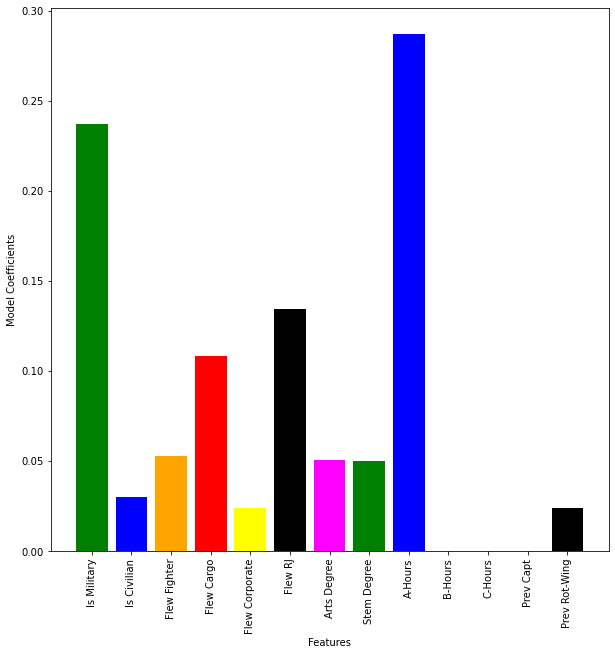

In [36]:
y_pos = np.arange(len(list(X.columns)))
bar_labels = X.columns
coef = estimator.feature_importances_
coefs = [i.tolist() for i in coef]


fig, ax = plt.subplots(figsize = (10,10))
my_colors2 = ["green","blue","orange","red","yellow","black","magenta"]
plt.bar(y_pos,coef, color = my_colors2 )
        #[val for sublist in coefs for val in sublist])
plt.xticks(y_pos, bar_labels, rotation=90)
plt.xlabel('Features')
plt.ylabel('Model Coefficients')
coefs

In [37]:
pilot_newbie = np.array([1,0,0,1,0,0,1,0,0,0,1,0,0]).reshape(1,-1)
newbie_prediction = estimator.predict(pilot_newbie)

In [38]:
print(f"Your trainee is predicted to have {abs(np.round(newbie_prediction.item())):.0f} retrains")

Your trainee is predicted to have 0 retrains


In [39]:
shareef_fng = np.array([1,0,1,0,0,0,0,0,1,0,0,0,0]).reshape(1,-1)
shareef_prediction  = estimator.predict(shareef_fng)

In [40]:
print(f"Isaac Shareef will likely have {np.round(shareef_prediction.item()):.0f} retrain")

Isaac Shareef will likely have 1 retrain


In [41]:
class_a = X.sample(20,replace = True, random_state=42)

In [42]:
class_a

,Is Military,Is Civilian,Flew Fighter,Flew Cargo,Flew Corporate,Flew RJ,Arts Degree,Stem Degree,A-Hours,B-Hours,C-Hours,Prev Capt,Prev Rot-Wing
15795,1,0,1,0,0,0,0,1,1,0,0,0,0
860,0,1,0,0,0,0,0,1,0,0,0,1,0
5390,1,0,1,0,0,0,0,1,1,0,0,0,0
11964,1,0,1,0,0,1,1,0,1,0,0,0,0
11284,0,1,0,0,0,1,1,0,1,0,0,1,0
6265,1,0,0,1,0,0,1,0,0,1,0,0,0
16850,1,0,1,0,0,0,0,1,1,0,0,0,0
4426,1,0,1,0,0,1,0,1,0,1,0,0,0
14423,1,0,1,0,0,0,0,1,1,0,0,0,0
11363,1,0,1,0,0,1,1,0,0,0,1,0,0


In [43]:
batch = class_a.to_csv("batch_data.csv", index=False)

In [44]:
arr_cls_a = np.array(class_a)

In [45]:
#creating an array of arrays
arr_cls_a

array([[1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0],
       [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0],
       [1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]], dtype=int64)

In [46]:
rets = np.abs(np.round(estimator.predict(arr_cls_a)))

In [47]:
print(f"This class is predicted to have a sum of {sum(rets):.0f} retrains")

This class is predicted to have a sum of 6 retrains


In [48]:
prob_est = LR(max_iter = 1000,
                solver = "lbfgs",
                multi_class='auto',
                random_state = 42)

In [49]:
prob_est.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [50]:
prob_est.score(X_test, y_test)

0.8235294117647058

In [51]:
from joblib import dump, load

In [52]:
dump(prob_est, "lr2.joblib")

['lr2.joblib']

In [53]:
prob_est.predict(pilot_newbie)

array([0])

In [54]:
prob_est.predict(shareef_fng)

array([0])

In [55]:
prob_est.predict_proba(shareef_fng)

array([[0.38510824, 0.30768963, 0.30720212]])

In [56]:
helo_boy = np.array([1,0,0,0,1,0,1,0,1,0,0,0,1]).reshape(1,-1)
prob_est.predict(helo_boy)

array([2])

In [57]:
prob_est.predict_proba(helo_boy)

array([[0.10098065, 0.43587934, 0.46314002]])

In [58]:
prob_est.predict_proba(pilot_newbie)

array([[1.00000000e+00, 1.98780574e-12, 1.94445185e-12]])

In [59]:
prob_est.predict_proba(class_a)

array([[1.47625009e-01, 4.29889620e-01, 4.22485371e-01],
       [9.99999993e-01, 3.56789096e-09, 3.43677739e-09],
       [1.47625009e-01, 4.29889620e-01, 4.22485371e-01],
       [9.98984189e-01, 5.01715666e-04, 5.14095047e-04],
       [9.99999999e-01, 5.93571193e-10, 6.04572590e-10],
       [1.00000000e+00, 1.20824736e-12, 1.18139651e-12],
       [1.47625009e-01, 4.29889620e-01, 4.22485371e-01],
       [9.99997414e-01, 1.31063619e-06, 1.27582202e-06],
       [1.47625009e-01, 4.29889620e-01, 4.22485371e-01],
       [9.99999672e-01, 1.63045246e-07, 1.64491254e-07],
       [1.47625009e-01, 4.29889620e-01, 4.22485371e-01],
       [1.00000000e+00, 1.20824736e-12, 1.18139651e-12],
       [8.88869581e-01, 5.54911952e-02, 5.56392235e-02],
       [9.99642552e-01, 1.75685773e-04, 1.81762696e-04],
       [1.00000000e+00, 1.25512569e-10, 1.21803956e-10],
       [9.99999988e-01, 5.80417734e-09, 5.81642291e-09],
       [9.99999999e-01, 5.93571193e-10, 6.04572590e-10],
       [6.92340570e-01, 1.52448